## Try to replicate SMT

In [1]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from tools import *


# Check that MPS is available
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("MPS is enabled!")
elif torch.cuda.is_available():
    device = torch.device("cuda")


MPS is enabled!


### 1. Generate data from Archimedean spiral

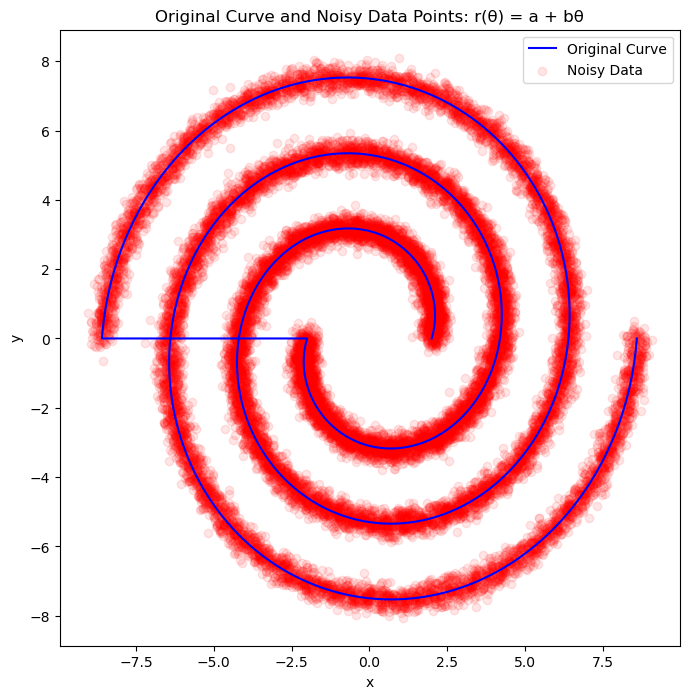

In [2]:
data = GenerateDataset()

## Sparse coding

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

class SparseCoding():
    def __init__(self, data_size, activ_dim, basisfunc_num, sparsity_level):
        super(SparseCoding, self).__init__()
        self.Basis = torch.randn(basisfunc_num, activ_dim, requires_grad=True)
        self.Activ = torch.randn(data_size, basisfunc_num, requires_grad=True)
        self.sparsity_level = sparsity_level

    def loss(self,data):
        reconstruction = self.Activ @ self.Basis

        # Compute the squared differences
        squared_error= (reconstruction - data) ** 2

        # Compute the sum of squared differences
        sum_squared_error = torch.sum(squared_error)

        # Compute the number of samples
        num_samples = data.shape[0]

        return sum_squared_error/num_samples
    
    def activ_panalty(self):
        return self.sparsity_level * torch.norm(abs(self.Activ), p=0.5) 

    def plot_basis(self):
        # Plotting in polar coordinates
        plt.figure(figsize=[6, 6])

        # Detach the tensor before converting to numpy
        basis_np = self.Basis.detach().numpy()

        # plot dictionary elements
        ax = plt.subplot(111)
        ax.scatter(basis_np[:, 0], basis_np[:, 1], label='landmarks', color='blue')

        # Setting the title and labels
        ax.set_title("Landmarks learnt by Sparse coding")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.legend()

        # Show the plot
        plt.show()


data_tensor = torch.tensor(data, dtype=torch.float)
# Create an instance of SparseCoding model
model = SparseCoding(data_size=data_tensor.shape[0], activ_dim=data_tensor.shape[1], basisfunc_num=100, sparsity_level=0)



In [4]:
# Define optimizer
optimizer = optim.Adam([model.Activ, model.Basis], lr=0.01)

# Number of optimization steps
num_epochs = 2000

# Training loop
for epoch in range(num_epochs):

    # Total loss = Reconstruction loss + Sparsity penalty
    cost = model.loss(data_tensor) + model.activ_panalty()
    
    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    with torch.no_grad():
        max_indices = torch.argmax(model.Activ, dim=1)  # Find indices of largest elements in each row
        model.Activ.zero_()  # Set all elements to 0
        model.Activ.scatter_(1, max_indices.unsqueeze(1), 1)  # Set largest elements to 1

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Cost = {cost}')

# After training, you can use the learned dictionary to encode new data
encoded_data = model.Activ @ model.Basis
print("Encoded data shape:", encoded_data.shape)


print(model.Basis.shape)





Epoch [10/2000], Cost = 33.39583206176758
Epoch [20/2000], Cost = 33.349971771240234
Epoch [30/2000], Cost = 33.32199478149414
Epoch [40/2000], Cost = 33.299415588378906
Epoch [50/2000], Cost = 33.278045654296875
Epoch [60/2000], Cost = 33.25635528564453
Epoch [70/2000], Cost = 33.23385238647461
Epoch [80/2000], Cost = 33.21045684814453
Epoch [90/2000], Cost = 33.186222076416016
Epoch [100/2000], Cost = 33.161251068115234
Epoch [110/2000], Cost = 33.135658264160156
Epoch [120/2000], Cost = 33.10954284667969
Epoch [130/2000], Cost = 33.0830078125
Epoch [140/2000], Cost = 33.05613708496094
Epoch [150/2000], Cost = 33.02901077270508
Epoch [160/2000], Cost = 33.00170135498047
Epoch [170/2000], Cost = 32.974266052246094
Epoch [180/2000], Cost = 32.946781158447266
Epoch [190/2000], Cost = 32.91927719116211
Epoch [200/2000], Cost = 32.89181900024414
Epoch [210/2000], Cost = 32.864444732666016
Epoch [220/2000], Cost = 32.837188720703125
Epoch [230/2000], Cost = 32.81009292602539
Epoch [240/200

tensor(31.6718, grad_fn=<DivBackward0>)


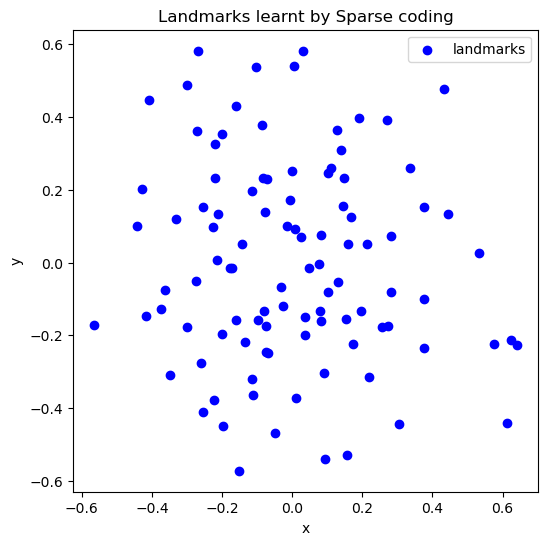

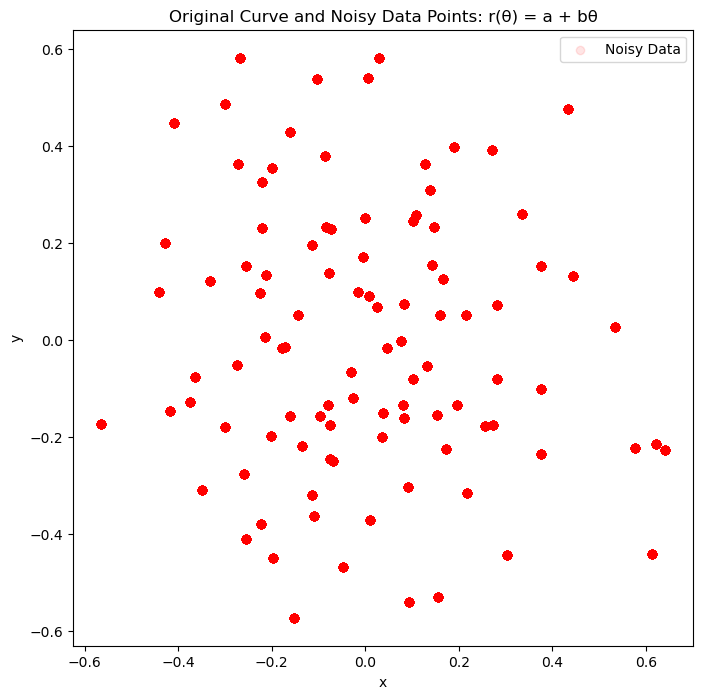

1.0


In [5]:
print(model.loss(data_tensor))


# # Compute the squared differences
# squared_error= (reconstruction - data) ** 2

# # Compute the sum of squared differences
# sum_squared_error = torch.sum(squared_error)

# # Compute the number of samples
# num_samples = data.shape[0]

# return sum_squared_error/num_samples
Bas = model.Basis.detach()
Act = model.Activ.detach()

recon = Act @ Bas
# Plotting in polar coordinates

# Original curve label='Original Curve', color='blue')
model.plot_basis()

plt.figure(figsize=[8, 8])

# Noisy data points
ax = plt.subplot(111)
ax.scatter(recon[:, 0], recon[:, 1], label='Noisy Data', color='red', alpha=0.1)

# Setting the title and labels
ax.set_title("Original Curve and Noisy Data Points: r(θ) = a + bθ")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

# Show the plot

print(np.linalg.norm(Act[0,:]))


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([-0.2686,  0.5823])
torch.Size([100])
tensor(1.)


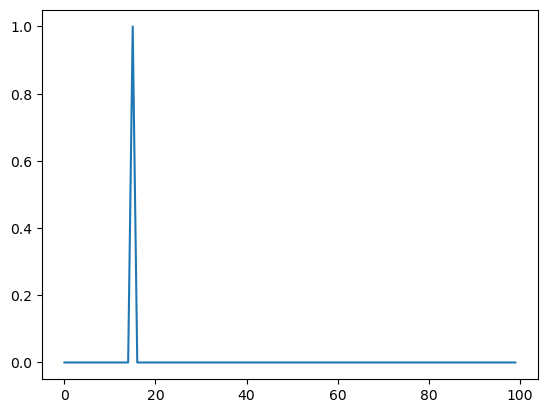

In [6]:
idx = 2034
print(Act[idx])
print(Act[idx] @ Bas)

vec = Act[idx] * Bas[:,0]
print(Act[idx].shape)
print(torch.norm(Act[idx],p=1))
plt.plot(Act[idx])
# plt.plot(Bas[:,0])